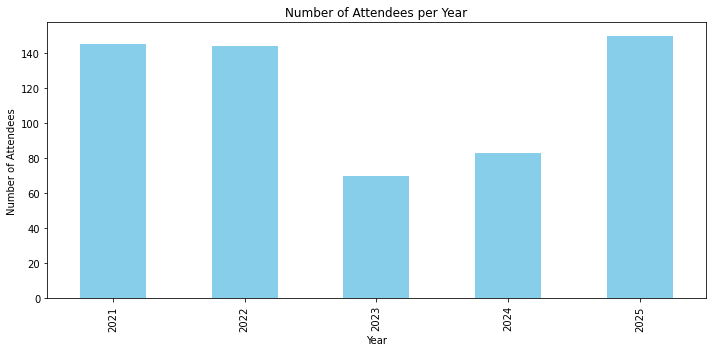

In [2]:
import matplotlib.pyplot as plt

attendee_counts = attendees.groupby("Year")["Name"].count()
attendee_counts.plot(kind="bar", figsize=(10, 5), color="skyblue", title="Number of Attendees per Year")
plt.ylabel("Number of Attendees")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


 File not found: metgala_data_cleaned/metgala_popculturechat_2021.json


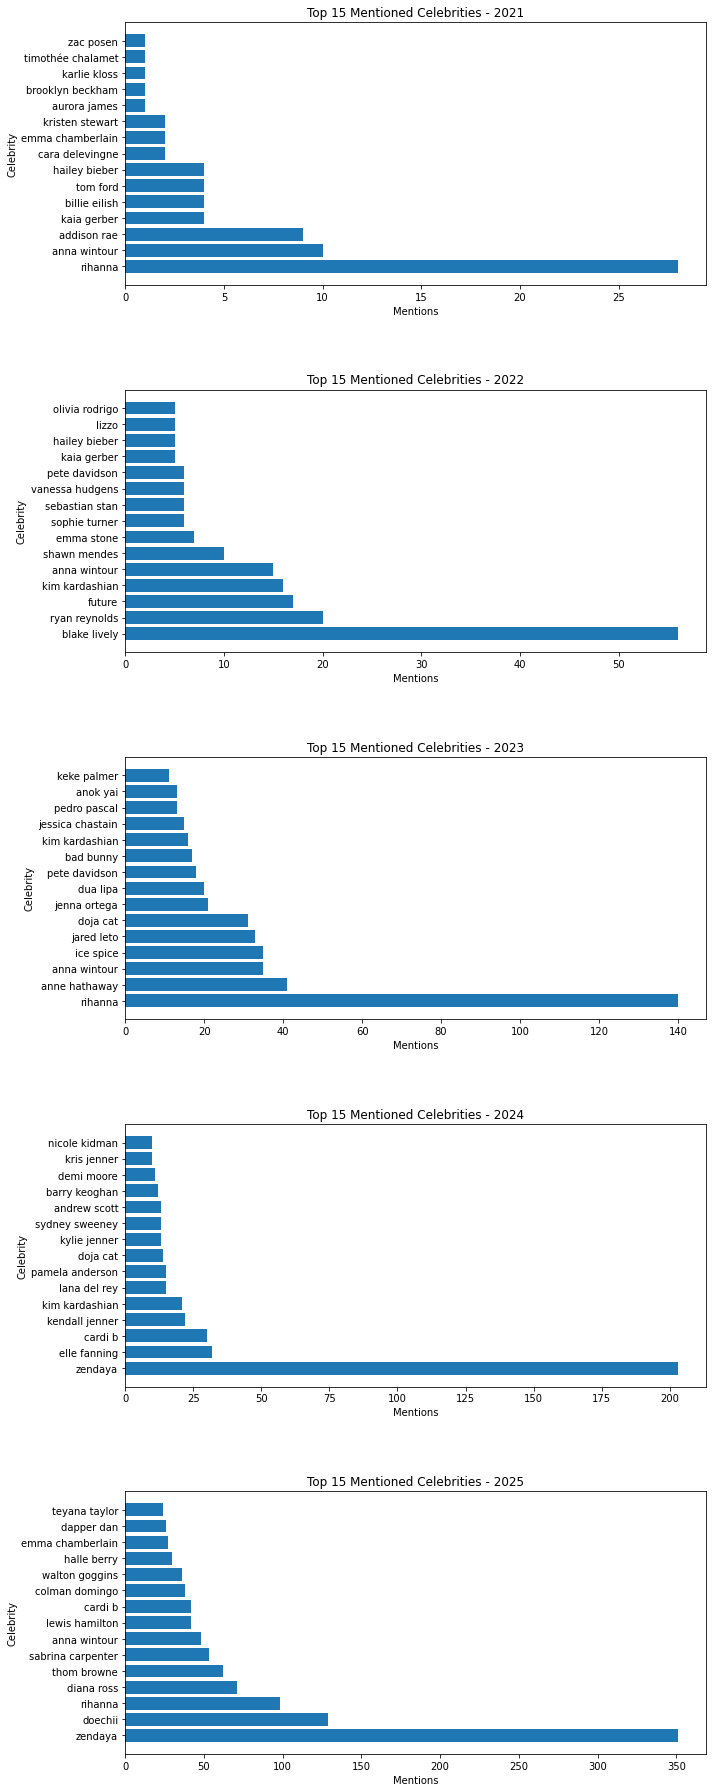

In [38]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# --- Load Attendees ---
attendee_df = pd.read_csv("attendees.csv")
attendee_df.dropna(subset=["Name", "Year"], inplace=True)

# Normalize names
attendee_df["Name"] = attendee_df["Name"].str.lower()
attendee_dict = defaultdict(list)
for _, row in attendee_df.iterrows():
    attendee_dict[int(row["Year"])].append(row["Name"])

# --- Load Reddit JSONs by Year (combine both subreddits) ---
def load_json_by_year(year):
    faux_path = f"metgala_data_cleaned/metgala_Fauxmoi_{year}.json"
    pop_path = f"metgala_data_cleaned/metgala_popculturechat_{year}.json"
    
    data = []
    for path in [faux_path, pop_path]:
        try:
            with open(path, "r", encoding="utf-8") as f:
                data.extend(json.load(f))
        except FileNotFoundError:
            print(f" File not found: {path}")
    return data

# --- Mention counter ---
yearly_mentions = {}

for year in range(2021, 2026):
    data = load_json_by_year(year)
    celeb_names = attendee_dict[year]
    pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, celeb_names)) + r')\b', re.IGNORECASE)

    mentions = Counter()

    for post in data:
        post_text = post.get("title", "") + " " + post.get("selftext", "")
        for name in pattern.findall(post_text.lower()):
            mentions[name.lower()] += 1
        for comment in post.get("comments", []):
            for name in pattern.findall(comment.get("body", "").lower()):
                mentions[name.lower()] += 1

    yearly_mentions[year] = dict(mentions.most_common(15))

# --- Plot ---
fig, axs = plt.subplots(nrows=len(yearly_mentions), figsize=(10, 5 * len(yearly_mentions)))


for idx, (year, mentions) in enumerate(sorted(yearly_mentions.items())):
    names = list(mentions.keys())
    counts = list(mentions.values())
    axs[idx].barh(names, counts)
    axs[idx].set_title(f"Top 15 Mentioned Celebrities - {year}")
    axs[idx].set_xlabel("Mentions")
    axs[idx].set_ylabel("Celebrity")


plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [9]:
import pandas as pd

# Load the data
attendees = pd.read_csv("attendees.csv")

# Clean data
attendees.dropna(subset=["Name"], inplace=True)
attendees["Name"] = attendees["Name"].str.strip()

# Count how many times each name appears
attendance_count = attendees["Name"].value_counts()

# Display top celebrities by attendance
print(" Celebrities with Most Appearances:")
for name, count in attendance_count.items():
    if count > 1:
        print(f"{name}: {count} times")


 Celebrities with Most Appearances:
Kendall Jenner: 5 times
Kim Kardashian: 5 times
Georgina Chapman: 4 times
Anna Wintour: 4 times
Serena Williams: 4 times
Kylie Jenner: 4 times
Gigi Hadid: 4 times
Adrien Brody: 4 times
Mindy Kaling: 4 times
Keke Palmer: 4 times
Emma Chamberlain: 4 times
Cynthia Erivo: 4 times
Pete Davidson: 3 times
Sydney Sweeney: 3 times
Michelle Yeoh: 3 times
Megan Thee Stallion: 3 times
Janelle Monáe: 3 times
Cara Delevingne: 3 times
Cardi B: 3 times
Olivia Rodrigo: 3 times
Bee Carrozzini: 3 times
Laura Harrier: 3 times
Alicia Keys: 3 times
Halle Bailey: 3 times
Gabrielle Union: 3 times
Jordan Roth: 3 times
Kris Jenner: 3 times
A$AP Rocky: 3 times
Irina Shayk: 3 times
Barry Keoghan: 3 times
Emily Ratajkowski: 3 times
Rihanna: 3 times
Nicki Minaj: 3 times
Hailey Bieber: 3 times
Doja Cat: 3 times
Nicole Kidman: 3 times
Sabrina Carpenter: 3 times
Lil Nas X: 3 times
Dua Lipa: 3 times
Quinta Brunson: 2 times
Tessa Thompson: 2 times
Bad Bunny: 2 times
Paloma Elsesser: 2

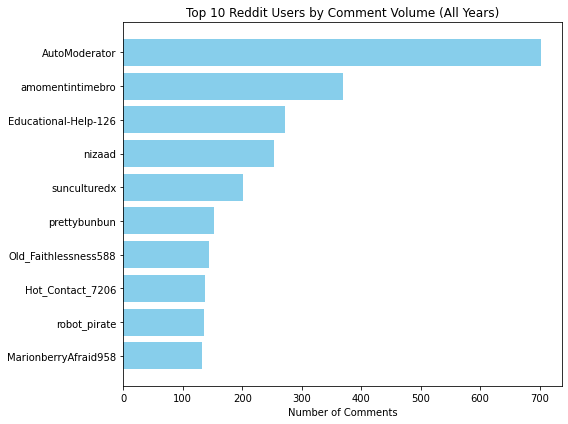

In [17]:
import os
import json
import collections
import matplotlib.pyplot as plt

# --- Step 1: Load all JSON files ---
data_dir = "metgala_data_cleaned"  # adjust if different
comment_authors = collections.Counter()

# Loop through all JSON files in the folder
for filename in os.listdir(data_dir):
    if filename.endswith(".json"):
        filepath = os.path.join(data_dir, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            posts = json.load(f)
            for post in posts:
                for comment in post.get("comments", []):
                    author = comment.get("author", "N/A")
                    if author != "N/A":
                        comment_authors[author] += 1

# --- Step 2: Get Top 10 Commenters ---
top_commenters = comment_authors.most_common(10)
users = [user for user, _ in top_commenters]
counts = [count for _, count in top_commenters]

# --- Step 3: Plot ---
plt.figure(figsize=(8, 6))
plt.barh(users[::-1], counts[::-1], color='skyblue')
plt.xlabel("Number of Comments")
plt.title("Top 10 Reddit Users by Comment Volume (All Years)")
plt.tight_layout()
plt.show()


In [23]:
import json

def load_users_from_file(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        data = json.load(f)

    users = set()

    for post in data:
        author = post.get("author", "N/A")
        if author != "N/A":
            users.add(author)

        for comment in post.get("comments", []):
            comment_author = comment.get("author", "N/A")
            if comment_author != "N/A":
                users.add(comment_author)

    return users

# Replace year as needed
year = 2025

# Paths to cleaned Reddit data for both subreddits
fauxmoi_file = f"metgala_data_cleaned/metgala_Fauxmoi_{year}.json"
popchat_file = f"metgala_data_cleaned/metgala_popculturechat_{year}.json"

# Load user sets
fauxmoi_users = load_users_from_file(fauxmoi_file)
popchat_users = load_users_from_file(popchat_file)

# Overlapping users
overlapping_users = fauxmoi_users.intersection(popchat_users)

# Summary
print(f" Users in r/Fauxmoi ({year}): {len(fauxmoi_users)}")
print(f" Users in r/popculturechat ({year}): {len(popchat_users)}")
print(f" Overlapping Users: {len(overlapping_users)}")

# Optional: View overlapping usernames
print("\nExample Overlapping Users:")
print(list(overlapping_users)[:10])  # show first 10


 Users in r/Fauxmoi (2025): 4553
 Users in r/popculturechat (2025): 5789
 Overlapping Users: 654

Example Overlapping Users:
['BookInteresting6717', 'im_not_into_this', 'starfire92', 'drag0naut26', 'InitiativeSad1021', 'beachgurl68', 'SallyJones17', 'Successful-Deer3465', 'hawkcarhawk', 'Prize_Impression2407']


2022: 43 overlapping users
2023: 174 overlapping users
2024: 105 overlapping users
2025: 654 overlapping users


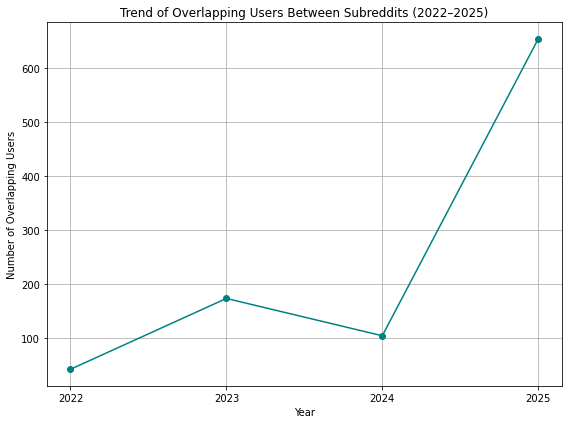

In [31]:
import json
import os
import matplotlib.pyplot as plt

folder = "metgala_data_cleaned"
years = [ 2022, 2023, 2024, 2025]
overlap_counts = {}

def get_authors_from_json(path):
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    authors = set()
    for post in data:
        if post.get("author") and post["author"] != "N/A":
            authors.add(post["author"])
        for comment in post.get("comments", []):
            if comment.get("author") and comment["author"] != "N/A":
                authors.add(comment["author"])
    return authors

for year in years:
    try:
        fauxmoi_path = os.path.join(folder, f"metgala_Fauxmoi_{year}.json")
        popchat_path = os.path.join(folder, f"metgala_popculturechat_{year}.json")

        authors_fauxmoi = get_authors_from_json(fauxmoi_path)
        authors_popchat = get_authors_from_json(popchat_path)

        overlap = authors_fauxmoi & authors_popchat
        overlap_counts[year] = len(overlap)

        print(f"{year}: {len(overlap)} overlapping users")

    except FileNotFoundError as e:
        print(f" Missing file for year {year}: {e}")
        continue

# ---- Plotting Line Chart ----
years_sorted = sorted(overlap_counts.keys())
values = [overlap_counts[yr] for yr in years_sorted]

plt.figure(figsize=(8, 6))
plt.plot(years_sorted, values, marker='o', linestyle='-', color='teal')
plt.xlabel("Year")
plt.ylabel("Number of Overlapping Users")
plt.title("Trend of Overlapping Users Between Subreddits (2022–2025)")
plt.grid(True)
plt.xticks(years_sorted)
plt.tight_layout()
plt.show()


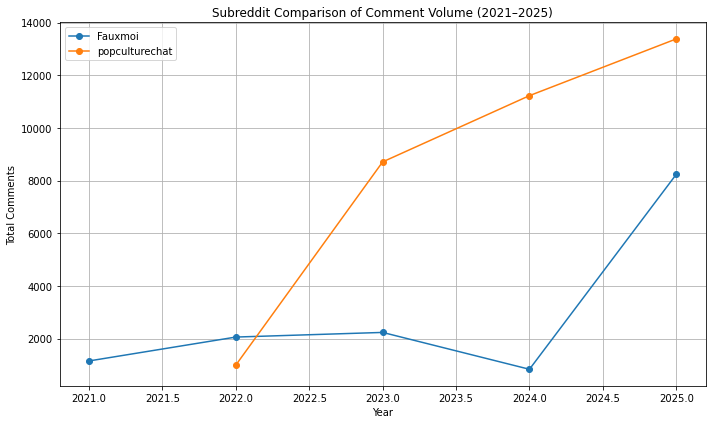

In [32]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = "metgala_data_cleaned"
years = [2021, 2022, 2023, 2024, 2025]
subreddits = ["Fauxmoi", "popculturechat"]

summary = []

for sub in subreddits:
    for year in years:
        path = os.path.join(folder, f"metgala_{sub}_{year}.json")
        if not os.path.exists(path): continue
        with open(path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        post_count = len(data)
        comment_count = sum(len(post.get("comments", [])) for post in data)
        summary.append({"Subreddit": sub, "Year": year, "Posts": post_count, "Comments": comment_count})

df = pd.DataFrame(summary)

# Plot
plt.figure(figsize=(10, 6))
for sub in subreddits:
    subset = df[df["Subreddit"] == sub]
    plt.plot(subset["Year"], subset["Comments"], marker='o', label=sub)
plt.xlabel("Year")
plt.ylabel("Total Comments")
plt.title("Subreddit Comparison of Comment Volume (2021–2025)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
import json
import pandas as pd
import os
import itertools
import networkx as nx
from collections import defaultdict

# Load attendees by year
attendee_df = pd.read_csv("attendees.csv")
attendee_df["Name"] = attendee_df["Name"].str.lower()
attendee_dict = attendee_df.groupby("Year")["Name"].apply(list).to_dict()

folder = "metgala_data_cleaned"
years = [2022, 2023, 2024, 2025]

for year in years:
    faux_path = os.path.join(folder, f"metgala_Fauxmoi_{year}.json")
    pop_path = os.path.join(folder, f"metgala_popculturechat_{year}.json")
    
    data = []
    if os.path.exists(faux_path):
        with open(faux_path, 'r', encoding='utf-8') as f:
            data += json.load(f)
    if os.path.exists(pop_path):
        with open(pop_path, 'r', encoding='utf-8') as f:
            data += json.load(f)

    if not data or year not in attendee_dict:
        continue

    celeb_names = list(set(attendee_dict[year]))
    celeb_set = set(celeb_names)
    co_mentions = defaultdict(int)

    for post in data:
        texts = [post.get("title", "") + " " + post.get("selftext", "")]
        texts += [comment.get("body", "") for comment in post.get("comments", [])]

        for text in texts:
            mentioned = set()
            lowered = text.lower()
            for celeb in celeb_set:
                if celeb in lowered:
                    mentioned.add(celeb)

            for pair in itertools.combinations(sorted(mentioned), 2):
                co_mentions[pair] += 1

    # Build graph
    G = nx.Graph()
    for (a, b), w in co_mentions.items():
        if w >= 2:
            G.add_edge(a, b, weight=w)

    filename = f"celeb_co_mentions_{year}.graphml"
    nx.write_graphml(G, filename)
    print(f" Saved: {filename} with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")


 Saved: celeb_co_mentions_2022.graphml with 4 nodes and 2 edges
 Saved: celeb_co_mentions_2023.graphml with 30 nodes and 129 edges
 Saved: celeb_co_mentions_2024.graphml with 19 nodes and 19 edges
 Saved: celeb_co_mentions_2025.graphml with 41 nodes and 47 edges


In [4]:
import json
import networkx as nx
from community import community_louvain

# ---------- CONFIG ----------
file_path = "metgala_data_cleaned/metgala_popculturechat_2025.json"
output_path = "popculturechat_2025_community.graphml"
# ----------------------------

# Step 1: Load data
with open(file_path, "r", encoding="utf-8") as f:
    posts = json.load(f)

# Step 2: Build interaction graph
G = nx.Graph()
for post in posts:
    author = post.get("author", "N/A")
    commenters = [c["author"] for c in post.get("comments", []) if c.get("author") != "N/A"]

    for commenter in commenters:
        if author != "N/A":
            G.add_edge(author, commenter)

    for i in range(len(commenters)):
        for j in range(i + 1, len(commenters)):
            G.add_edge(commenters[i], commenters[j])

print(f" Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# Step 3: Community detection
partition = {}
if G.number_of_nodes() > 1:
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, 'community')
    
    # Step 4: Export to Gephi-readable file
    nx.write_graphml(G, output_path)
    print(f" Graph exported to '{output_path}'")
else:
    print(" Graph too small to detect communities.")


 Nodes: 5789, Edges: 670343
 Graph exported to 'popculturechat_2025_community.graphml'


In [5]:
from networkx.algorithms.community.quality import modularity
from collections import defaultdict, Counter

# Step 4: Evaluate community detection
# Convert partition dict into list of sets for modularity calculation
community_dict = defaultdict(set)
for node, comm_id in partition.items():
    community_dict[comm_id].add(node)
communities = list(community_dict.values())

# Calculate modularity
mod_score = modularity(G, communities)
print(f" Modularity Score: {round(mod_score, 4)}")

# Count number and sizes of communities
comm_sizes = Counter(partition.values())
print(f" Number of Communities: {len(comm_sizes)}")
print(" Top 5 Community Sizes:", comm_sizes.most_common(5))


 Modularity Score: 0.5916
 Number of Communities: 18
 Top 5 Community Sizes: [(1, 1618), (3, 408), (10, 372), (14, 340), (9, 325)]


In [2]:
import json
import networkx as nx
from community import community_louvain

# ---------- CONFIG ----------
file_path = "metgala_data_cleaned/metgala_Fauxmoi_2025.json"
output_path = "fauxmoi_2025_community.graphml"
# ----------------------------

# Step 1: Load data
with open(file_path, "r", encoding="utf-8") as f:
    posts = json.load(f)

# Step 2: Build interaction graph
G = nx.Graph()
for post in posts:
    author = post.get("author", "N/A")
    commenters = [c["author"] for c in post.get("comments", []) if c.get("author") != "N/A"]

    for commenter in commenters:
        if author != "N/A":
            G.add_edge(author, commenter)

    for i in range(len(commenters)):
        for j in range(i + 1, len(commenters)):
            G.add_edge(commenters[i], commenters[j])

print(f" Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

# Step 3: Community detection
# Step 3: Community detection
partition = {}
if G.number_of_nodes() > 1:
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, 'community')
    
    # Step 4: Export to Gephi-readable file
    nx.write_graphml(G, output_path)
    print(f" Graph exported to '{output_path}'")
else:
    print(" Graph too small to detect communities.")

 Nodes: 4553, Edges: 370085
 Graph exported to 'fauxmoi_2025_community.graphml'


In [3]:
from networkx.algorithms.community.quality import modularity
from collections import defaultdict, Counter

# Step 4: Evaluate community detection
# Convert partition dict into list of sets for modularity calculation
community_dict = defaultdict(set)
for node, comm_id in partition.items():
    community_dict[comm_id].add(node)
communities = list(community_dict.values())

# Calculate modularity
mod_score = modularity(G, communities)
print(f" Modularity Score: {round(mod_score, 4)}")

# Count number and sizes of communities
comm_sizes = Counter(partition.values())
print(f" Number of Communities: {len(comm_sizes)}")
print(" Top 5 Community Sizes:", comm_sizes.most_common(5))


 Modularity Score: 0.6726
 Number of Communities: 18
 Top 5 Community Sizes: [(9, 625), (3, 412), (13, 402), (15, 371), (2, 359)]


Fauxmoi_2023 — Nodes: 1157, Edges: 78132
  Modularity: 0.6703
  Communities: 11
  Top 5 Sizes: [(2, 197), (3, 173), (4, 140), (7, 126), (1, 116)]


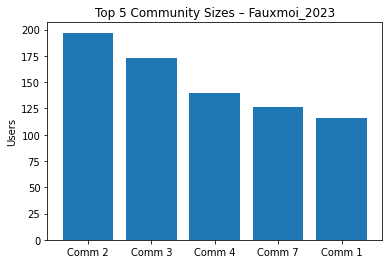

Fauxmoi_2024 — Nodes: 559, Edges: 40624
  Modularity: 0.5367
  Communities: 6
  Top 5 Sizes: [(0, 212), (2, 150), (1, 63), (3, 58), (4, 49)]


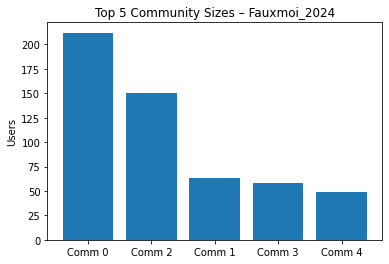

Fauxmoi_2025 — Nodes: 4553, Edges: 370085
  Modularity: 0.6743
  Communities: 16
  Top 5 Sizes: [(2, 534), (12, 509), (11, 471), (4, 454), (7, 439)]


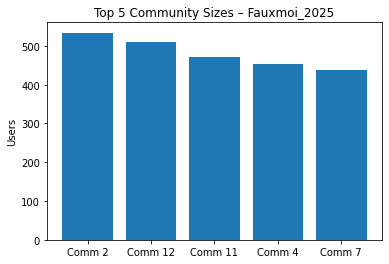

<Figure size 432x288 with 0 Axes>

In [7]:
import json
import networkx as nx
from community import community_louvain
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

def analyze_year(file_path, label):
    with open(file_path, "r", encoding="utf-8") as f:
        posts = json.load(f)

    G = nx.Graph()
    for post in posts:
        author = post.get("author", "N/A")
        commenters = [c["author"] for c in post.get("comments", []) if c.get("author") != "N/A"]

        for commenter in commenters:
            if author != "N/A":
                G.add_edge(author, commenter)
        for i in range(len(commenters)):
            for j in range(i + 1, len(commenters)):
                G.add_edge(commenters[i], commenters[j])

    print(f"{label} — Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

    if G.number_of_nodes() > 1:
        partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, partition, "community")
        nx.write_graphml(G, f"{label}_community.graphml")

        community_dict = defaultdict(set)
        for node, cid in partition.items():
            community_dict[cid].add(node)
        communities = list(community_dict.values())

        from networkx.algorithms.community.quality import modularity
        mod_score = modularity(G, communities)
        comm_sizes = Counter(partition.values())
        print(f"  Modularity: {round(mod_score, 4)}")
        print(f"  Communities: {len(comm_sizes)}")
        print(f"  Top 5 Sizes: {comm_sizes.most_common(5)}")

        # Plot community size distribution
        top = comm_sizes.most_common(5)
        sizes = [s[1] for s in top]
        labels = [f"Comm {s[0]}" for s in top]
        plt.bar(labels, sizes)
        plt.title(f"Top 5 Community Sizes – {label}")
        plt.ylabel("Users")
        plt.savefig(f"{label}_top5_comms.png")
        plt.show()
        plt.clf()
    else:
        print(f"{label} graph too small for community detection.")

# Run for each year
analyze_year("metgala_data_cleaned/metgala_Fauxmoi_2023.json", "Fauxmoi_2023")
analyze_year("metgala_data_cleaned/metgala_Fauxmoi_2024.json", "Fauxmoi_2024")
analyze_year("metgala_data_cleaned/metgala_Fauxmoi_2025.json", "Fauxmoi_2025")


In [14]:
import json
import networkx as nx
from community import community_louvain
from collections import defaultdict, Counter
from networkx.algorithms.community.quality import modularity

# ---------- CONFIG ----------
files = {
    "Fauxmoi_2023": "metgala_data_cleaned/metgala_Fauxmoi_2023_cleaned.json",
    "Fauxmoi_2024": "metgala_data_cleaned/metgala_Fauxmoi_2024_cleaned.json"
}
# ----------------------------

def build_and_save_community_graph(file_path, output_name):
    # Step 1: Load data
    with open(file_path, "r", encoding="utf-8") as f:
        posts = json.load(f)

    # Step 2: Build interaction graph
    G = nx.Graph()
    for post in posts:
        author = post.get("author", "N/A")
        commenters = [c["author"] for c in post.get("comments", []) if c.get("author") != "N/A"]

        for commenter in commenters:
            if author != "N/A":
                G.add_edge(author, commenter)
        for i in range(len(commenters)):
            for j in range(i + 1, len(commenters)):
                G.add_edge(commenters[i], commenters[j])

    print(f"\n{output_name} — Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

    # Step 3: Community detection
    if G.number_of_nodes() > 1:
        partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, partition, 'community')

        # Save GraphML in current directory
        graphml_path = f"{output_name}.graphml"
        nx.write_graphml(G, graphml_path)
        print(f"  Saved to: {graphml_path}")

        # Evaluation
        community_dict = defaultdict(set)
        for node, comm_id in partition.items():
            community_dict[comm_id].add(node)
        communities = list(community_dict.values())

        mod_score = modularity(G, communities)
        comm_sizes = Counter(partition.values())

        print(f"  Modularity: {round(mod_score, 4)}")
        print(f"  Communities: {len(comm_sizes)}")
        print(f"  Top 5 Sizes: {comm_sizes.most_common(5)}")
    else:
        print("  Graph too small for community detection.")

# --- Run for each year
for name, path in files.items():
    build_and_save_community_graph(path, name)



Fauxmoi_2023 — Nodes: 1157, Edges: 78132
  Saved to: Fauxmoi_2023.graphml
  Modularity: 0.6703
  Communities: 11
  Top 5 Sizes: [(2, 197), (3, 173), (4, 140), (6, 126), (0, 116)]

Fauxmoi_2024 — Nodes: 559, Edges: 40624
  Saved to: Fauxmoi_2024.graphml
  Modularity: 0.5367
  Communities: 6
  Top 5 Sizes: [(0, 212), (2, 150), (1, 63), (5, 58), (4, 49)]


In [16]:
import json
import networkx as nx
from community import community_louvain
from collections import defaultdict, Counter
from networkx.algorithms.community.quality import modularity

# ---------- CONFIG ----------
files = {
    "popculturechat_2023": "metgala_data_cleaned/metgala_popculturechat_2023.json",
    "popculturechat_2024": "metgala_data_cleaned/metgala_popculturechat_2024.json"
}
# ----------------------------

def build_and_save_community_graph(file_path, output_name):
    # Step 1: Load data
    with open(file_path, "r", encoding="utf-8") as f:
        posts = json.load(f)

    # Step 2: Build interaction graph
    G = nx.Graph()
    for post in posts:
        author = post.get("author", "N/A")
        commenters = [c["author"] for c in post.get("comments", []) if c.get("author") != "N/A"]

        for commenter in commenters:
            if author != "N/A":
                G.add_edge(author, commenter)
        for i in range(len(commenters)):
            for j in range(i + 1, len(commenters)):
                G.add_edge(commenters[i], commenters[j])

    print(f"\n{output_name} — Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

    # Step 3: Community detection
    if G.number_of_nodes() > 1:
        partition = community_louvain.best_partition(G)
        nx.set_node_attributes(G, partition, 'community')

        # Save GraphML in current directory
        graphml_path = f"{output_name}.graphml"
        nx.write_graphml(G, graphml_path)
        print(f"  Saved to: {graphml_path}")

        # Evaluation
        community_dict = defaultdict(set)
        for node, comm_id in partition.items():
            community_dict[comm_id].add(node)
        communities = list(community_dict.values())

        mod_score = modularity(G, communities)
        comm_sizes = Counter(partition.values())

        print(f"  Modularity: {round(mod_score, 4)}")
        print(f"  Communities: {len(comm_sizes)}")
        print(f"  Top 5 Sizes: {comm_sizes.most_common(5)}")
    else:
        print("  Graph too small for community detection.")

# --- Run for each year
for name, path in files.items():
    build_and_save_community_graph(path, name)



popculturechat_2023 — Nodes: 4205, Edges: 472531
  Saved to: popculturechat_2023.graphml
  Modularity: 0.7018
  Communities: 16
  Top 5 Sizes: [(11, 963), (9, 348), (1, 347), (2, 320), (13, 296)]

popculturechat_2024 — Nodes: 5351, Edges: 733702
  Saved to: popculturechat_2024.graphml
  Modularity: 0.6021
  Communities: 20
  Top 5 Sizes: [(1, 863), (3, 360), (5, 359), (19, 334), (6, 325)]


In [23]:
import networkx as nx
from collections import defaultdict
import os

def load_partitioned_graph(path):
    G = nx.read_graphml(path)
    # Extract partition from node attributes
    partition = defaultdict(set)
    for node, data in G.nodes(data=True):
        comm = data.get('community')
        if comm is not None:
            partition[str(comm)].add(node)
    return G, partition

def jaccard_similarity(comm1, comm2):
    return len(comm1 & comm2) / len(comm1 | comm2) if comm1 | comm2 else 0

def compare_communities(partition1, partition2):
    scores = []
    for comm1 in partition1.values():
        best = max(jaccard_similarity(comm1, comm2) for comm2 in partition2.values())
        scores.append(best)
    return sum(scores) / len(scores) if scores else 0

# File paths
years = ['2025']
for year in years:
    faux_path = f"Fauxmoi_{year}_community.graphml"
    pop_path = f"popculturechat_{year}_community.graphml"
    
    if os.path.exists(faux_path) and os.path.exists(pop_path):
        G_faux, part_faux = load_partitioned_graph(faux_path)
        G_pop, part_pop = load_partitioned_graph(pop_path)

        sim = compare_communities(part_faux, part_pop)
        print(f"Community overlap (Jaccard-based) for {year}: {sim:.4f}")
    else:
        print(f"Files missing for year {year}: {faux_path}, {pop_path}")


Community overlap (Jaccard-based) for 2025: 0.0101
